In [1]:
# Import libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Optional: make plots appear inside the notebook
%matplotlib inline


In [2]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('../data/metadata.csv')

# Show the first 5 rows
df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file,url
0,vho70jcx,f056da9c64fbf00a4645ae326e8a4339d015d155,biorxiv,SIANN: Strain Identification by Alignment to N...,10.1101/001727,NaN,NaN,biorxiv,Next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/001727
1,i9tbix2v,daf32e013d325a6feb80e83d15aabc64a48fae33,biorxiv,Spatial epidemiology of networked metapopulati...,10.1101/003889,NaN,NaN,biorxiv,An emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/003889
2,62gfisc6,f33c6d94b0efaa198f8f3f20e644625fa3fe10d2,biorxiv,Sequencing of the human IG light chain loci fr...,10.1101/006866,NaN,NaN,biorxiv,Germline variation at immunoglobulin gene (IG)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/006866
3,058r9486,4da8a87e614373d56070ed272487451266dce919,biorxiv,Bayesian mixture analysis for metagenomic comm...,10.1101/007476,NaN,NaN,biorxiv,Deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/007476
4,wich35l7,eccef80cfbe078235df22398f195d5db462d8000,biorxiv,Mapping a viral phylogeny onto outbreak trees ...,10.1101/010389,NaN,NaN,biorxiv,Developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/010389


In [3]:
df.shape

(45774, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45774 entries, 0 to 45773
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cord_uid                     45774 non-null  object 
 1   sha                          31753 non-null  object 
 2   source_x                     45774 non-null  object 
 3   title                        45617 non-null  object 
 4   doi                          42440 non-null  object 
 5   pmcid                        26243 non-null  object 
 6   pubmed_id                    34641 non-null  float64
 7   license                      45774 non-null  object 
 8   abstract                     37912 non-null  object 
 9   publish_time                 45765 non-null  object 
 10  authors                      43774 non-null  object 
 11  journal                      41707 non-null  object 
 12  Microsoft Academic Paper ID  964 non-null    float64
 13  WHO #Covidence  

In [5]:
df.isnull().sum()

cord_uid                           0
sha                            14021
source_x                           0
title                            157
doi                             3334
pmcid                          19531
pubmed_id                      11133
license                            0
abstract                        7862
publish_time                       9
authors                         2000
journal                         4067
Microsoft Academic Paper ID    44810
WHO #Covidence                 44006
has_full_text                      0
full_text_file                 10216
url                              302
dtype: int64

In [6]:
df.describe()

,pubmed_id,Microsoft Academic Paper ID
count,3.464100e+04,9.640000e+02
mean,2.211744e+07,2.709918e+09
std,7.644808e+06,4.839708e+08
min,2.142000e+03,3.912630e+07
25%,1.770678e+07,2.393002e+09
50%,2.366180e+07,3.003251e+09
75%,2.815361e+07,3.005639e+09
max,3.220645e+07,3.006672e+09


In [7]:
# Percentage of missing values per column
missing_percent = df.isnull().mean() * 100
missing_percent.sort_values(ascending=False)

Microsoft Academic Paper ID    97.894001
WHO #Covidence                 96.137545
pmcid                          42.668327
sha                            30.630926
pubmed_id                      24.321667
full_text_file                 22.318347
abstract                       17.175689
journal                         8.884957
doi                             7.283611
authors                         4.369293
url                             0.659763
title                           0.342989
publish_time                    0.019662
cord_uid                        0.000000
source_x                        0.000000
license                         0.000000
has_full_text                   0.000000
dtype: float64

In [9]:
# Drop rows where title or publish_time is missing, and make a copy
df_clean = df.dropna(subset=['title', 'publish_time']).copy()

# Fill missing abstracts safely
df_clean['abstract'] = df_clean['abstract'].fillna("No abstract")

# Check new shape
df_clean.shape

(45608, 17)

In [10]:
# Convert publish_time to datetime
df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')

# Remove rows where conversion failed
df_clean = df_clean.dropna(subset=['publish_time'])

# Extract year from publish_time
df_clean['year'] = df_clean['publish_time'].dt.year

# Check the first few rows
df_clean[['title', 'publish_time', 'year']].head()

,title,publish_time,year
0,SIANN: Strain Identification by Alignment to N...,2014-01-10,2014
1,Spatial epidemiology of networked metapopulati...,2014-06-04,2014
2,Sequencing of the human IG light chain loci fr...,2014-07-03,2014
3,Bayesian mixture analysis for metagenomic comm...,2014-07-25,2014
4,Mapping a viral phylogeny onto outbreak trees ...,2014-11-11,2014


In [11]:
# Add a column for abstract word count
df_clean['abstract_word_count'] = df_clean['abstract'].apply(lambda x: len(str(x).split()))

# Preview
df_clean[['abstract', 'abstract_word_count']].head()

,abstract,abstract_word_count
0,Next-generation sequencing is increasingly bei...,184
1,An emerging disease is one infectious epidemic...,136
2,Germline variation at immunoglobulin gene (IG)...,200
3,Deep sequencing of clinical samples is now an ...,234
4,Developing methods to reconstruct transmission...,227


In [12]:
# Count number of papers per year
papers_per_year = df_clean['year'].value_counts().sort_index()

# Display
papers_per_year

year
1951       1
1952       1
1955       1
1957       1
1959       1
        ... 
2016    2965
2017    2911
2018    3094
2019    3144
2020    2953
Name: count, Length: 65, dtype: int64

C:\Users\PC\AppData\Local\Temp\ipykernel_12528\257193381.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=papers_per_year.index, y=papers_per_year.values, palette="viridis")


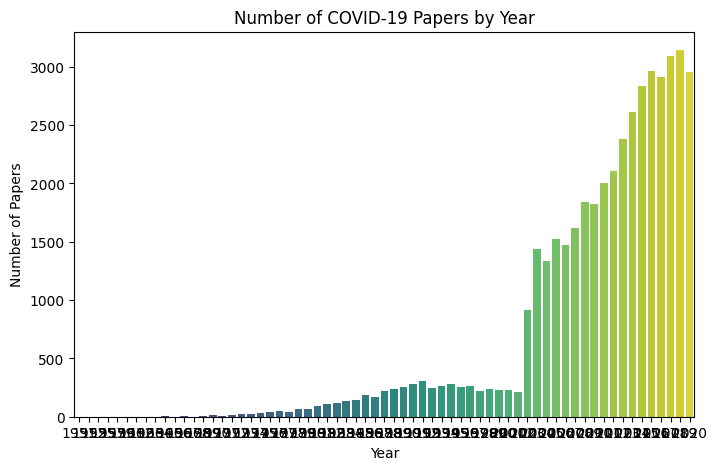

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(x=papers_per_year.index, y=papers_per_year.values, palette="viridis")
plt.title("Number of COVID-19 Papers by Year")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.show()

In [14]:
# Count papers per journal
top_journals = df_clean['journal'].value_counts().head(10)

# Display
top_journals

journal
Journal of Virology        1740
PLoS One                   1567
Virology                    864
Emerg Infect Dis            745
The Lancet                  596
Viruses                     565
Virus Research              495
Sci Rep                     491
Vaccine                     483
Veterinary Microbiology     443
Name: count, dtype: int64

C:\Users\PC\AppData\Local\Temp\ipykernel_12528\586087014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_journals.values, y=top_journals.index, palette="coolwarm")


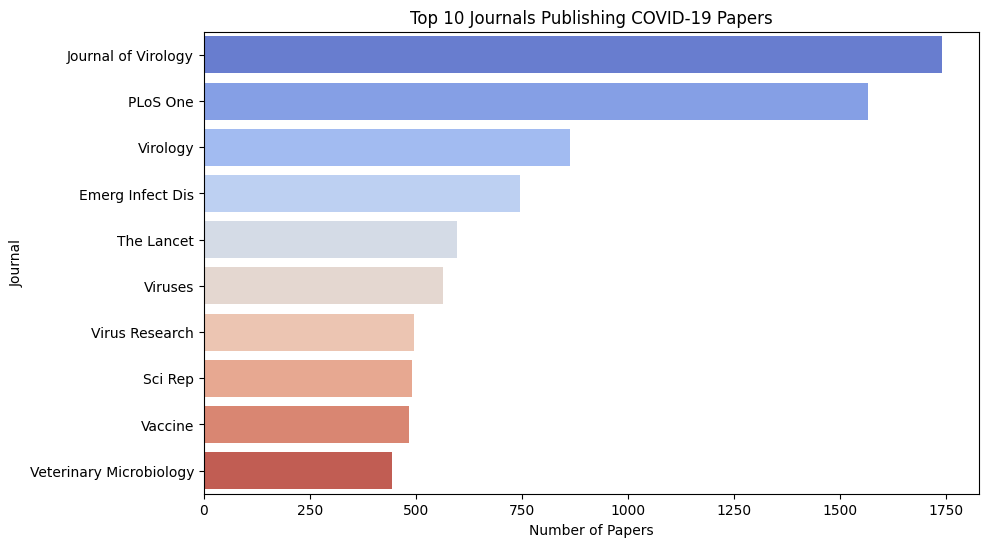

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_journals.values, y=top_journals.index, palette="coolwarm")
plt.title("Top 10 Journals Publishing COVID-19 Papers")
plt.xlabel("Number of Papers")
plt.ylabel("Journal")
plt.show()

In [16]:
from collections import Counter

# Combine all titles into one string
all_titles = " ".join(df_clean['title'].astype(str))

# Split into words and count frequency
words = all_titles.split()
word_freq = Counter(words)

# Show top 20 words
word_freq.most_common(20)

[('of', 32635),
 ('and', 21084),
 ('in', 19153),
 ('the', 14191),
 ('for', 7327),
 ('a', 7124),
 ('to', 5237),
 ('with', 4899),
 ('virus', 3976),
 ('A', 3935),
 ('by', 3453),
 ('The', 3084),
 ('Virus', 2995),
 ('on', 2874),
 ('from', 2796),
 ('respiratory', 2556),
 ('Respiratory', 2294),
 ('coronavirus', 2184),
 ('Coronavirus', 1819),
 ('infection', 1810)]

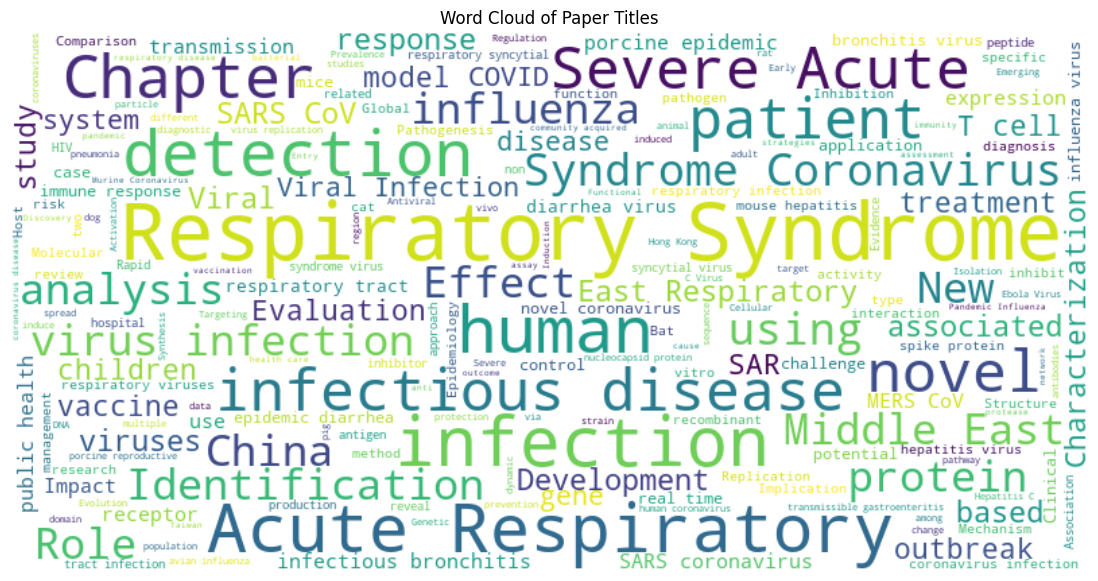

In [17]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Display
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Paper Titles")
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_12528\2434386994.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.index, y=source_counts.values, palette="magma")


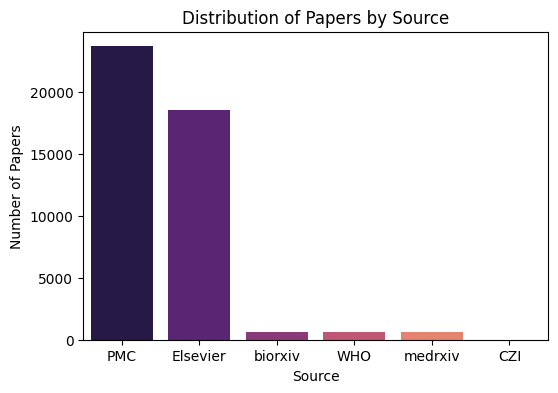

In [18]:
# Count papers by source
source_counts = df_clean['source_x'].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=source_counts.index, y=source_counts.values, palette="magma")
plt.title("Distribution of Papers by Source")
plt.xlabel("Source")
plt.ylabel("Number of Papers")
plt.show()